# XQAOA - Minimal Working Example

This Jupyter notebook contains a minimal working example of classically simulating the XQAOA ansatz for the MaxCut problem.

This notebook uses the **Graph.py** and **XQAOA.py** files along with the [Numpy](https://numpy.org/), [NetworkX](https://networkx.org/), [SciPy](https://scipy.org/), and [Matplotlib](https://matplotlib.org/) libraries.

In this notebook, we will show you how to:
1. Create an unweighted $D$-regular graph with NetworkX.
2. Initialise out Graph and XQAOA classes.
3. Modify the $\alpha$ and $\beta$ angles to create XQAOA variants.
4. Optimise the angles of the XQAOA ansatz using the LBFGS method.

## Import the Relevant Libraries

In [ ]:
import numpy as np
from Graph import *
from XQAOA import *
import networkx as nx
from scipy import optimize
import matplotlib.pyplot as plt

## Generate a $D$-Regular Graph

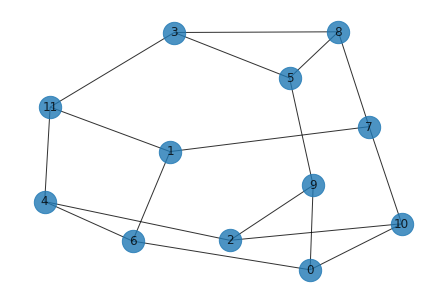

In [2]:
d_regular_graph = nx.random_regular_graph(3, 12, seed = 42)

num_nodes = d_regular_graph.number_of_nodes()
num_edges = d_regular_graph.number_of_edges()
nx.draw(d_regular_graph, with_labels=True, alpha=0.8, node_size=500)

## Initialise the Graph and XQAOA Classes

In [ ]:
myGraph = Graph(num_nodes, list(d_regular_graph.edges()))
xqaoa = XQAOA(myGraph)

## Generate Variants of the XQAOA Ansatz and Optimise their Angles

In [ ]:
# Angles for XQAOA with the XY Mixer
angles1 = np.random.uniform(0, 2*np.pi, 2*num_nodes + num_edges)
# Angles for XQAOA with the X=Y Mixer, Y Mixer, and the X Mixer
angles2 = np.random.uniform(0, 2*np.pi, num_nodes + num_edges)
# Angles for QAOA
angles3 = np.random.uniform(0, 2*np.pi, 2)

# A simple function to check if the user passes in the correct number of angles.
def check_angles(angles, n, m):
    assert len(angles) == n + m, "Incorrect Number of Angles Passed"

### 1. XQAOA (XY Mixer) Ansatz

This is the most general mixer and the default ansatz that arises directly from equation 22 of the paper.

In [19]:
# Cost Function for the XY Mixer
def cost_1(angles):
    check_angles(angles, 2*num_nodes, num_edges)
    xqaoa.set_angles(angles)
    return -xqaoa.total_cost()

# Optimising the XQAOA ansatz with the XY Mixer
res1 = optimize.minimize(cost_1, angles1, method = 'L-BFGS-B',options={'disp': True})

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53285D+00    |proj g|=  6.42183D-01

At iterate    1    f= -1.07584D+01    |proj g|=  5.37754D-01

At iterate    2    f= -1.17445D+01    |proj g|=  6.56920D-01

At iterate    3    f= -1.26466D+01    |proj g|=  1.50051D+00

At iterate    4    f= -1.35140D+01    |proj g|=  4.59310D-01

At iterate    5    f= -1.37130D+01    |proj g|=  7.55983D-01

At iterate    6    f= -1.38903D+01    |proj g|=  2.63680D-01

At iterate    7    f= -1.39549D+01    |proj g|=  1.62144D-01

At iterate    8    f= -1.39848D+01    |proj g|=  7.57359D-02

At iterate    9    f= -1.39920D+01    |proj g|=  1.07385D-01

At iterate   10    f= -1.39948D+01    |proj g|=  4.73475D-02

At iterate   11    f= -1.39957D+01    |proj g|=  3.13594D-02

At iterate   12    f= -1.39968D+01    |proj g|=  2.74138D-02

At iterate   13    f= -1.3

### 2. XQAOA (X=Y Mixer) Ansatz

This ansatz arises by setting $\alpha_i$ = $\beta_i$ for all vertices $i$ in graph.

In [21]:
# Cost Function for the X=Y Mixer
def cost_2(angles):
    check_angles(angles, num_nodes, num_edges)
    new_angles = np.concatenate((angles[:num_nodes], angles[:num_nodes], angles[num_nodes:]), axis=None)
    xqaoa.set_angles(new_angles)
    return -xqaoa.total_cost()

# Optimising the XQAOA ansatz with the X=Y Mixer
res2 = optimize.minimize(cost_2, angles2, method = 'L-BFGS-B',options={'disp': True})

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.49024D+00    |proj g|=  6.86790D-01

At iterate    1    f= -9.53118D+00    |proj g|=  7.15721D-01

At iterate    2    f= -9.59385D+00    |proj g|=  7.25368D-01


 This problem is unconstrained.



At iterate    3    f= -9.96510D+00    |proj g|=  2.93396D-01

At iterate    4    f= -1.01185D+01    |proj g|=  6.47756D-01

At iterate    5    f= -1.03491D+01    |proj g|=  3.39333D-01

At iterate    6    f= -1.08220D+01    |proj g|=  7.69114D-01

At iterate    7    f= -1.12905D+01    |proj g|=  7.64418D-01

At iterate    8    f= -1.16993D+01    |proj g|=  8.31772D-01

At iterate    9    f= -1.25629D+01    |proj g|=  1.37356D+00

At iterate   10    f= -1.36327D+01    |proj g|=  1.26817D+00

At iterate   11    f= -1.44508D+01    |proj g|=  1.11306D+00

At iterate   12    f= -1.48224D+01    |proj g|=  8.37559D-01

At iterate   13    f= -1.50522D+01    |proj g|=  7.15580D-01

At iterate   14    f= -1.52483D+01    |proj g|=  8.37409D-01

At iterate   15    f= -1.57212D+01    |proj g|=  6.46336D-01

At iterate   16    f= -1.59064D+01    |proj g|=  4.20078D-01

At iterate   17    f= -1.59795D+01    |proj g|=  1.96796D-01

At iterate   18    f= -1.59940D+01    |proj g|=  8.74904D-02

At iter

### 3. XQAOA (Y Mixer) Ansatz

This ansatz arises by setting $\beta_i = 0$ for all vertices $i$ in graph.

In [22]:
# Cost Function for the Y Mixer
def cost_3(angles):
    check_angles(angles, num_nodes, num_edges)
    new_angles = np.concatenate((angles[:num_nodes], np.array([0 for i in range(num_nodes)]), angles[num_nodes:]), axis=None)
    xqaoa.set_angles(new_angles)
    return -xqaoa.total_cost()

# Optimising the XQAOA ansatz with the Y Mixer
res3 = optimize.minimize(cost_3, angles2, method = 'L-BFGS-B',options={'disp': True})

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.66782D+00    |proj g|=  6.91719D-01

At iterate    1    f= -9.23746D+00    |proj g|=  3.81210D-01

At iterate    2    f= -9.71145D+00    |proj g|=  4.01559D-01

At iterate    3    f= -9.87996D+00    |proj g|=  7.45687D-01

At iterate    4    f= -1.04910D+01    |proj g|=  8.57837D-01

At iterate    5    f= -1.09388D+01    |proj g|=  1.66101D+00

At iterate    6    f= -1.21251D+01    |proj g|=  7.72376D-01

At iterate    7    f= -1.28758D+01    |proj g|=  9.68932D-01

At iterate    8    f= -1.35282D+01    |proj g|=  1.07512D+00

At iterate    9    f= -1.38310D+01    |proj g|=  6.54266D-01

At iterate   10    f= -1.44482D+01    |proj g|=  5.83684D-01

At iterate   11    f= -1.49803D+01    |proj g|=  8.19309D-01

At iterate   12    f= -1.53455D+01    |proj g|=  7.29118D-01

At iterate   13    f= -1.5

### 4. XQAOA (X Mixer) Ansatz also known as MA-QAOA

This ansatz arises by setting $\alpha_i = 0$ for all vertices $i$ in graph.

In [23]:
# Cost Function for the X Mixer (i.e. MA-QAOA)
def cost_4(angles):
    check_angles(angles, num_nodes, num_edges)
    new_angles = np.concatenate((np.array([0 for i in range(num_nodes)]), angles[:num_nodes], angles[num_nodes:]), axis=None)
    xqaoa.set_angles(new_angles)
    return -xqaoa.total_cost()

# Optimising the XQAOA ansatz with the X Mixer
res4 = optimize.minimize(cost_4, angles2, method = 'L-BFGS-B',options={'disp': True})

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.75930D+00    |proj g|=  7.99372D-01

At iterate    1    f= -1.07898D+01    |proj g|=  3.33377D-01

At iterate    2    f= -1.12356D+01    |proj g|=  3.10785D-01

At iterate    3    f= -1.15394D+01    |proj g|=  5.01146D-01

At iterate    4    f= -1.18653D+01    |proj g|=  2.45356D-01

At iterate    5    f= -1.20465D+01    |proj g|=  3.80202D-01

At iterate    6    f= -1.21749D+01    |proj g|=  1.65293D-01

At iterate    7    f= -1.23083D+01    |proj g|=  1.39365D-01

At iterate    8    f= -1.24223D+01    |proj g|=  1.80894D-01

At iterate    9    f= -1.24612D+01    |proj g|=  1.50073D-01

At iterate   10    f= -1.24898D+01    |proj g|=  1.28791D-01

At iterate   11    f= -1.24972D+01    |proj g|=  3.22169D-02

At iterate   12    f= -1.24989D+01    |proj g|=  1.72095D-02

At iterate   13    f= -1.2

### 5. QAOA Ansatz

This ansatz arises by setting $\alpha_i = 0$, $\beta_i = \beta$, and $\gamma_{uv} = \gamma$ for all vertices $i$ and all edges $\{ u, v \}$ present in the graph.

In [24]:
# Cost Function for QAOA
def cost_5(angles):
    check_angles(angles, 1, 1)
    beta, gamma = angles
    new_angles = np.concatenate((np.array([0 for i in range(num_nodes)]), np.array([beta for i in range(num_nodes)]), 
                                 np.array([gamma for i in range(num_edges)])), axis=None)
    xqaoa.set_angles(new_angles)
    return -xqaoa.total_cost()

# Optimising the QAOA ansatz
res5 = optimize.minimize(cost_5, angles3, method = 'L-BFGS-B',options={'disp': True})

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.05245D+00    |proj g|=  5.26656D+00


 This problem is unconstrained.



At iterate    1    f= -8.92488D+00    |proj g|=  2.09747D+00

At iterate    2    f= -9.02959D+00    |proj g|=  1.87975D+00

At iterate    3    f= -1.22379D+01    |proj g|=  1.93263D+00

At iterate    4    f= -1.22590D+01    |proj g|=  1.54086D+00

At iterate    5    f= -1.22892D+01    |proj g|=  1.21084D+00

At iterate    6    f= -1.23026D+01    |proj g|=  1.28636D-01

At iterate    7    f= -1.23027D+01    |proj g|=  1.07825D-04

At iterate    8    f= -1.23027D+01    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     15      1     0     0   3.553D-07  -1.230D+01
  F =  -12.3027196838